# Predicting Hotel Booking Demand Analysis and Booking Cancellations Using Machine Learning with Python

In this project, I have built an end-end Industry oriented and real-world Data-driven Machine learning project in the Hotel Industry (Hospitality) using AGILE CRISP-DM Methodology right from understanding the Business problem to the Model deployment of Web Application on
Heroku Cloud using Python and Streamlit. 

A complete description  and source code of the project can be found in the [GitHub Repository](https://github.com/ChaithanyaVamshi/Hotel_Booking_Demand_Cancel_Predictor)

**Machine Learning Project Workflow**

Machine learning project comprises various steps required to build an end-end project. Such a process or workflow of drawing insights from data is best described by CRISP-DM methodology.

The acronym CRISP-DM stands for Cross Industry Standard Process for Data Mining (CRISPDM) is a process model with six phases that naturally describes the data science life cycle.

The life cycle of Machine Learning Project

1. Business Understanding
2. Data Collection and Understanding
3. Data Exploration
4. Data Preparation
5. Modelling
6. Model Evaluation
7. Model Deployment

# Clustering - UnSupervised Machine Learning

## 1.1 Business Problem - Clustering
In this project, I have implemented UnSupervised Machine learning algorithm for clustering problem in the Hotel Industry.

**Problem Statement :** Identifying profitable hotel customers/guests by customer market segmentation.


## 1.2 Data Collection

For this project, I have selected a data set containing hotel booking information that was uploaded to Kaggle, an online community of data scientists, by user Jesse Mostipak.

This dataset is available at Kaggle in the link: [Hotel Booking Demand Kaggle Dataset](https://www.kaggle.com/jessemostipak/hotel-booking-demand)


**Steps performed for Data Collection through Kaggle Application Programming Interface (API)**

1. Install Kaggle Library
2. Upload Kaggle.json file downloaded from Kaggle into Google Colab
3. Configure path of Json file
4. Copy Kaggle API Command to fetch the dataset from Kaggle
5. Extract Zip file and read the dat

Importing Dataset through Kaggle API

In [ ]:
# installing the Kaggle library
!pip install Kaggle

Upload your Kaggle.json file

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the  Dataset

In [ ]:
# API to fetch the dataset from Kaggl
!kaggle datasets download -d jessemostipak/hotel-booking-demand

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 41.1MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/hotel-booking-demand.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

<Figure size 864x432 with 0 Axes>

In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')
pd.set_option('display.max_columns',None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 1.3 Data Preparation

**Handling Missing Values**

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_nan:
    print('{} : {}% Missing values'.format(feature,np.around(df[feature].isnull().mean(),4)))

children : 0.0% Missing values
country : 0.0041% Missing values
agent : 0.1369% Missing values
company : 0.9431% Missing values


From the above Analysis, it shows percentage of missing values in feature.


- "Company" feature has almost 94% missing values. Therefore, we do not have enough values to fill the rows or Impute the company column by mean, median etc. Hence we can drop the "Company" feature.
- "Agent" feature has 13.69% missing values. "Agent" feature is travel agency Id and these values are unique and we cannot impute Id by mean, median or mode. Since, missing values are 13% of all data we can't drop them. Therefore, missing data for "Agent" can be filled by 0.
-"Country" feature has 0.4% missing values. Since missing data of "Country" is less than 1%, we can will impute with most frequent value (Mode).
- "Children" feature has only 4 missing values and we can fill these missing values by 0 considering guests have no children.

In [ ]:
#Dropping the "Company" feature
df.drop(columns = ['company'],inplace= True)

In [ ]:
#Filling missing values by 0 for "Agent" feature
df['agent']= df['agent'].fillna(0)

In [ ]:
#Imputing missing values of "Country" feature
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [ ]:
#Filling missing values by 0 for "Children" feature 
df['children']= df['children'].fillna(0)

All missing values in the data set are handled succcessfully

In [ ]:
df1 = df.copy()

**Feature Encoding (Encoding Categorical Variables**)

In [ ]:
cat_feature = [feature for feature in df1.columns if df1[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  12


In [ ]:
print(cat_feature)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [ ]:
df1[cat_feature][:3]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02


**Let us check how many unique (Distinct) labels exists in each categorical features**

In [ ]:
for feature in cat_feature:
    print("{} : {} labels ".format(feature,len(df1[feature].unique())))

hotel : 2 labels 
arrival_date_month : 12 labels 
meal : 5 labels 
country : 177 labels 
market_segment : 8 labels 
distribution_channel : 5 labels 
reserved_room_type : 10 labels 
assigned_room_type : 12 labels 
deposit_type : 3 labels 
customer_type : 4 labels 
reservation_status : 3 labels 
reservation_status_date : 926 labels 


The “Market Segment” attribute entries in the dataset are categorical and these values should be encoded to apply cluster analysis on the dataset to cluster or group by market segment type.

To encode the “market segment” feature, I will apply a custom mapping technique to convert it into a numeric feature.


In [ ]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df1['market_segment'] = df1['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO' : 3,
       'Complementary' : 4, 'Groups' : 5, 'Aviation' : 6, 'Undefined' : 0 })

In [ ]:
#Custom mapping
df1['hotel'] = df1['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
df1['arrival_date_month'] = df1['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [ ]:
#Replacing "Undefined" with "SC" as mentioned in data set description
df1["meal"].replace("Undefined", "SC", inplace=True)

In [ ]:
#Applying label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1['meal'] = le.fit_transform(df1['meal'])
df1['deposit_type'] = le.fit_transform(df1['deposit_type'])
df1['customer_type'] = le.fit_transform(df1['customer_type'])
df1['distribution_channel'] = le.fit_transform(df1['distribution_channel'])
df1['reserved_room_type'] = le.fit_transform(df1['reserved_room_type'])
df1['assigned_room_type']= le.fit_transform(df1['assigned_room_type'])
df1['reservation_status'] = le.fit_transform(df1['reservation_status'])
df1['reservation_status_date'] = le.fit_transform(df1['reservation_status_date'])
df1['country'] = le.fit_transform(df1['country'])

### 1.4 Modeling - Clustering

In [ ]:
df1.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,0.0,0,0,135,0,1,0,0,0,2,2,3,0,0.0,0,2,0.0,0,0,1,121
1,0,0,737,2015,7,27,1,0,0,2,0.0,0,0,135,0,1,0,0,0,2,2,4,0,0.0,0,2,0.0,0,0,1,121
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,0,59,0,1,0,0,0,0,2,0,0,0.0,0,2,75.0,0,0,1,122


In [ ]:
df1.shape

(119390, 31)

In [ ]:
df1['market_segment'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
x= df1[['adr','lead_time']]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
X = scale(x)

Text(0, 0.5, 'WCSS')

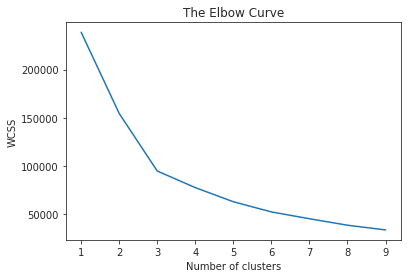

In [ ]:
wcss=[]
for i in range(1,10):
  km = KMeans(i)
  km.fit(X)
  wcss_iter = km.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
identified_clusters = km.fit_predict(X)
identified_clusters

array([1, 1, 2, ..., 0, 4, 3], dtype=int32)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans (n_clusters=7,random_state=42)
km.fit(X)

KMeans(n_clusters=7, random_state=42)

**Market Segment Clustering Before Applying K-Means Algorithm**

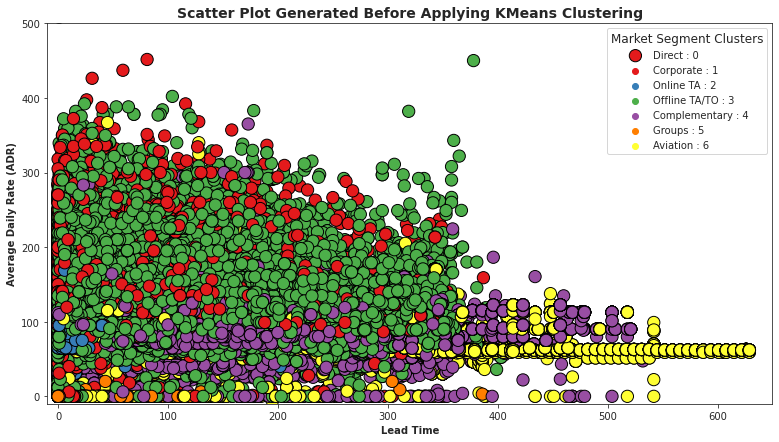

In [ ]:
plt.figure(figsize=(13,7))
sns.set_style('ticks')
ax = sns.scatterplot(x='lead_time', y ='adr',hue = 'market_segment' ,data=df1,s = 150,edgecolor = 'black',palette = 'Set1')
ax.set_title('Scatter Plot Generated Before Applying KMeans Clustering',fontsize = 14, weight='bold')
ax.set_xlabel("Lead Time",weight = 'bold')
ax.set_ylabel("Average Daily Rate (ADR)",weight = 'bold')
ax.set(xlim =(-10,650))
ax.set(ylim=(-10,500))
plt.legend(labels=["Direct : 0", "Corporate : 1", "Online TA : 2", "Offline TA/TO : 3","Complementary : 4",
                   "Groups : 5", "Aviation : 6"], title = "Market Segment Clusters", title_fontsize = "12");


**Market Segment Clustering After Applying K-Means Algorithm**

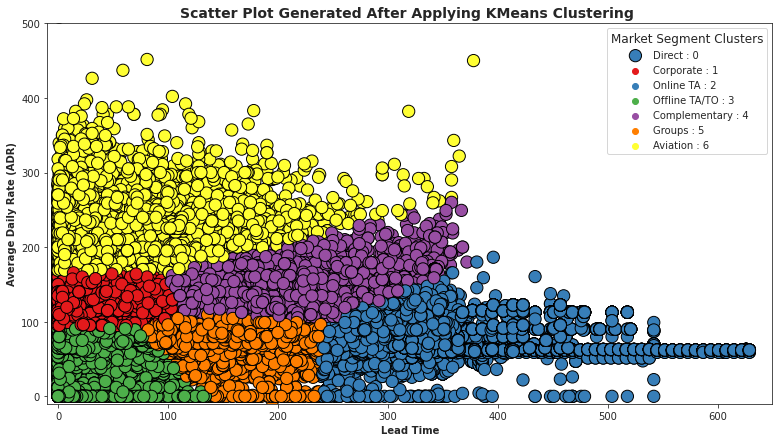

In [ ]:
data_with_clusters = df1.copy()

plt.figure(figsize=(13,7))
sns.set_style('ticks')
data_with_clusters['Clusters'] = identified_clusters 
ax = sns.scatterplot(data_with_clusters['lead_time'],data_with_clusters['adr'],
                hue=data_with_clusters['Clusters'],palette = 'Set1',s = 150,edgecolor = 'black')
ax.set_title('Scatter Plot Generated After Applying KMeans Clustering ',fontsize = 14, weight='bold')
ax.set_xlabel("Lead Time",weight = 'bold')
ax.set_ylabel("Average Daily Rate (ADR)",weight = 'bold')
ax.set(xlim =(-10,650))
ax.set(ylim=(-10,500))
plt.legend(labels=["Direct : 0", "Corporate : 1", "Online TA : 2", "Offline TA/TO : 3","Complementary : 4",
                   "Groups : 5", "Aviation : 6"], title = "Market Segment Clusters", title_fontsize = "12"); 

## 1.5 Model Evaluation 

In [ ]:
# Import the scikit-learn function used to calculate the Silhouette Coefficient
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Coefficient using a random sample of the observations to reduce computational cost
print('Silhouette Coefficient of k-means Output: ',
      round(silhouette_score(X, identified_clusters, sample_size = 20000, random_state = 42), 2))

Silhouette Coefficient of k-means Output:  0.38


In [ ]:
from sklearn.cluster import KMeans
km3 = KMeans (n_clusters=3,random_state=42)
km3.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
identified_clusters3 = km3.fit_predict(X)
identified_clusters3

array([2, 2, 1, ..., 0, 1, 0], dtype=int32)

In [ ]:
# Import the scikit-learn function used to calculate the Silhouette Coefficient
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Coefficient using a random sample of the observations to reduce computational cost
print('Silhouette Coefficient of k-means Output: ',
      round(silhouette_score(X, identified_clusters3, sample_size = 20000, random_state = 42), 2))

Silhouette Coefficient of k-means Output:  0.44


In [ ]:
from sklearn.cluster import KMeans
km4 = KMeans (n_clusters=4,random_state=42)
km4.fit(X)

KMeans(n_clusters=4, random_state=42)

In [ ]:
identified_clusters4 = km4.fit_predict(X)
identified_clusters4

array([1, 1, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Coefficient using a random sample of the observations to reduce computational cost
print('Silhouette Coefficient of k-means Output: ',
      round(silhouette_score(X, identified_clusters4, sample_size = 20000, random_state = 42), 2))

Silhouette Coefficient of k-means Output:  0.37


In [ ]:
from sklearn.cluster import KMeans
km5 = KMeans (n_clusters=5,random_state=42)
km5.fit(X)

KMeans(n_clusters=5, random_state=42)

In [ ]:
identified_clusters5 = km5.fit_predict(X)
identified_clusters5

array([0, 0, 1, ..., 2, 4, 4], dtype=int32)

In [ ]:
# Import the scikit-learn function used to calculate the Silhouette Coefficient
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Coefficient using a random sample of the observations to reduce computational cost
print('Silhouette Coefficient of k-means Output: ',
      round(silhouette_score(X, identified_clusters5, sample_size = 20000, random_state = 42), 2))

Silhouette Coefficient of k-means Output:  0.37


The Silhouette Coefficient of 0.38 indicates that the k-means algorithm was successful at grouping the hotel bookings into 7 clusters (K= 7).

Depending on how a hotel would utilize these clusters, the k-means output could still provide business value despite the lack of clear separation between the clusters.